<a href="https://colab.research.google.com/github/jamieewong/heartdiseasepredictor/blob/main/AISC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#loads dataset into df
df = pd.read_csv('../lib/heart.csv')

df.head()
df.shape

df.target.value_counts()

,count
target,
1,526
0,499


<ipython-input-3-8de937f49403>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='thal', data=df, palette='bwr')


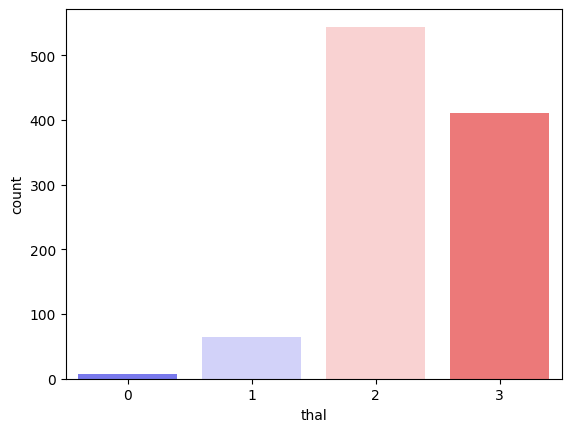

<ipython-input-3-8de937f49403>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='bwr')


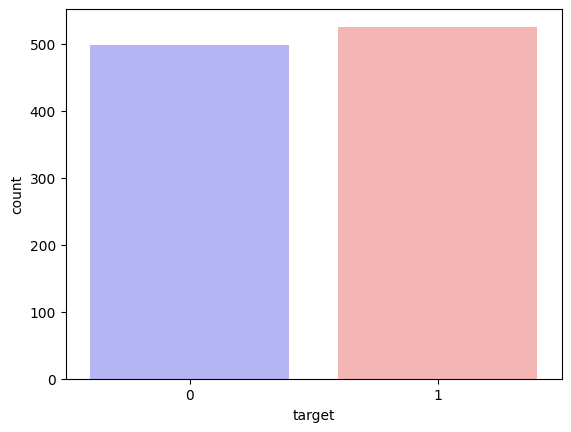

In [3]:
#countplot displaying "thal" (number representing an assessment of blood flow during exercise)
sns.countplot(x='thal', data=df, palette='bwr')
plt.show()

#countplot displaying "target" (a number representing whether an individual has heart disease)
sns.countplot(x='target', data=df, palette='bwr')
plt.show()

In [4]:
#count of people with value of 2 in slope column
count2slope = len(df[df.slope == 2])
print('percentage of people that have a slope of 2: {:.2f}%'.format(count2slope/(len(df.slope))*100))

ca_count = len(df[df.ca == 1])
print('percentage of people that have a ca of 1: {:.2f}%'.format(ca_count/len(df.ca)*100))

percentage of people that have a slope of 2: 45.76%
percentage of people that have a ca of 1: 22.05%


In [5]:
#gets mean values of each column within the dataset depending on whether a patient has heart disease or not
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


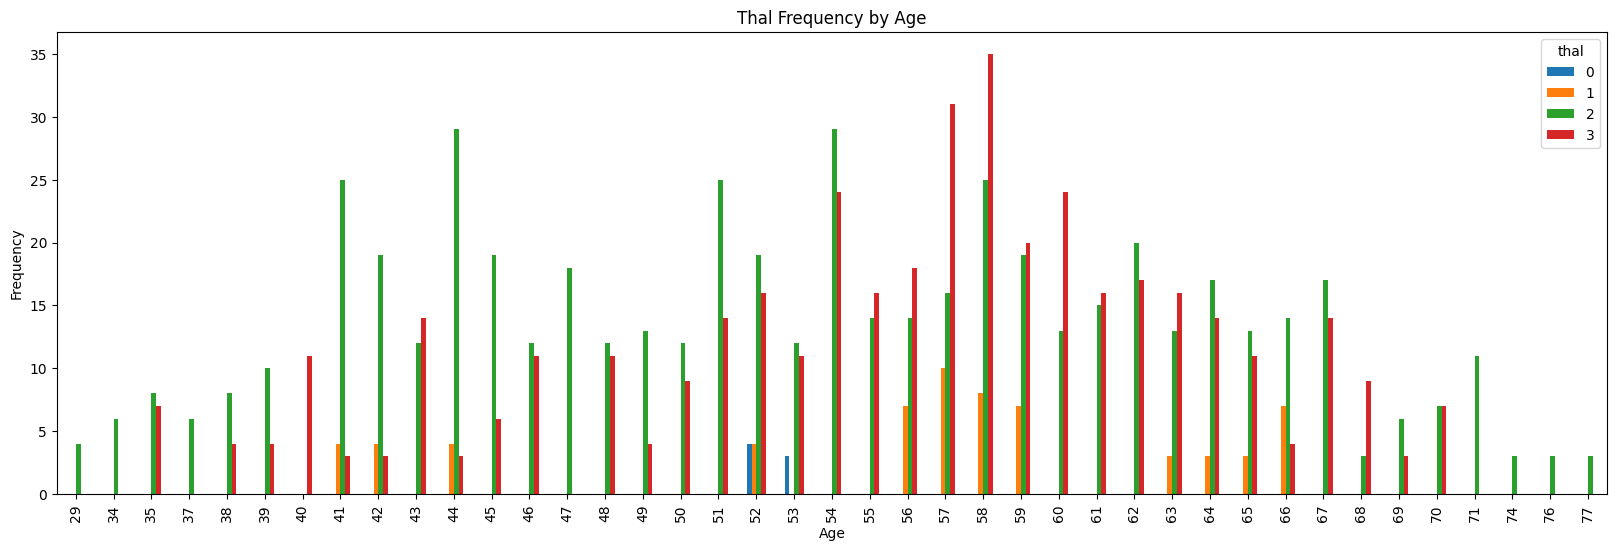

In [6]:
pd.crosstab(df.age, df.thal).plot(kind = 'bar', figsize = (20, 6))
plt.title('Thal Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

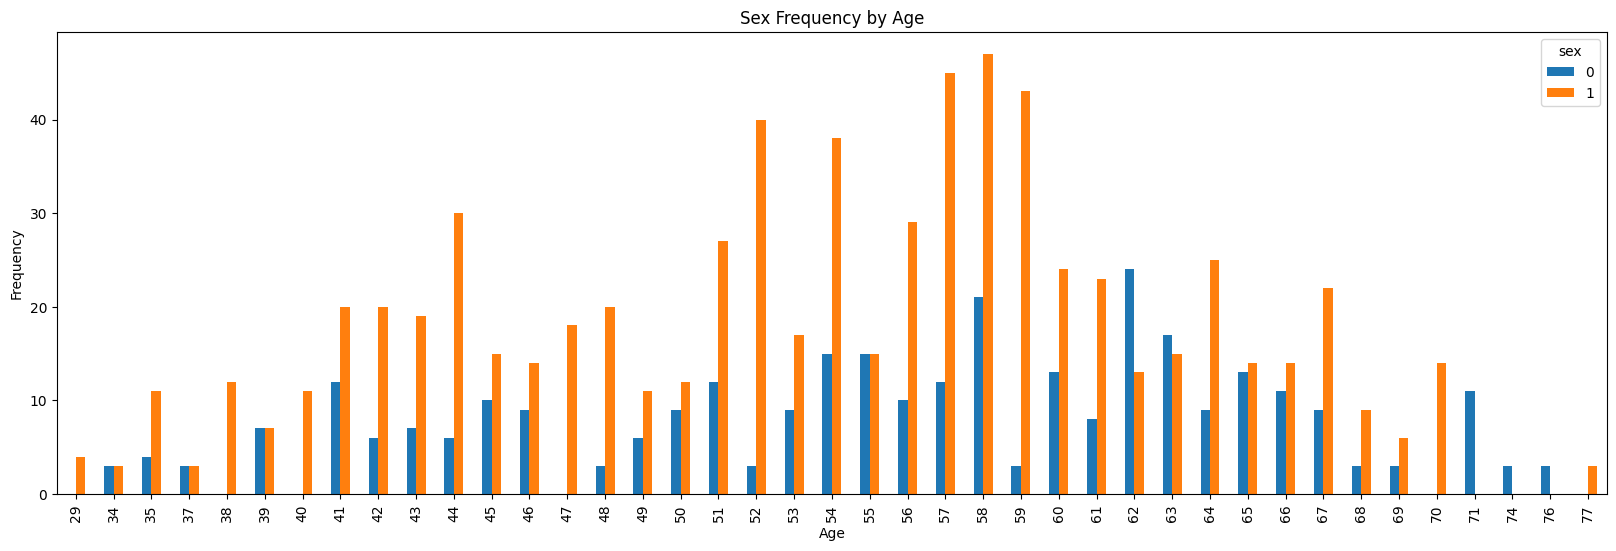

In [7]:
pd.crosstab(df.age, df.sex).plot(kind = 'bar', figsize = (20, 6))
plt.title('Sex Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

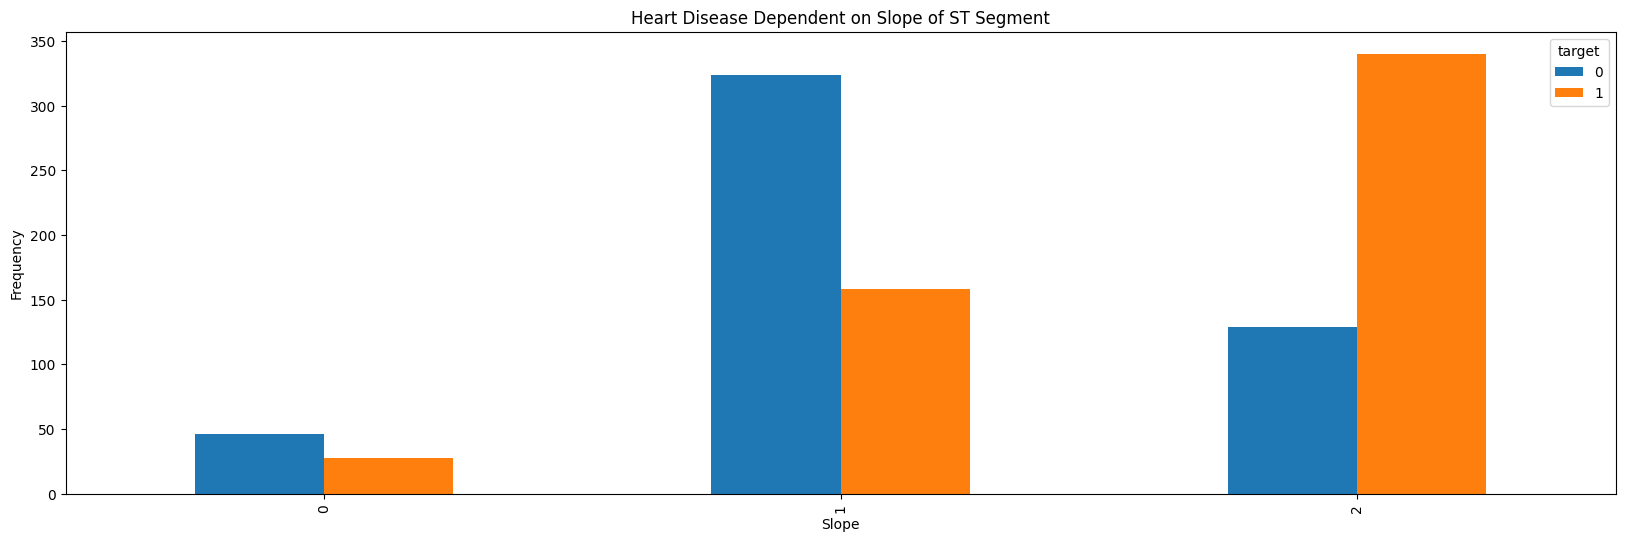

In [8]:
# slope of the ST segment is positively correlated to having heart disease (higher slope -> higher likelihood of heart disease)
pd.crosstab(df.slope, df.target).plot(kind = 'bar', figsize = (20, 6))
plt.title('Heart Disease Dependent on Slope of ST Segment')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.show()

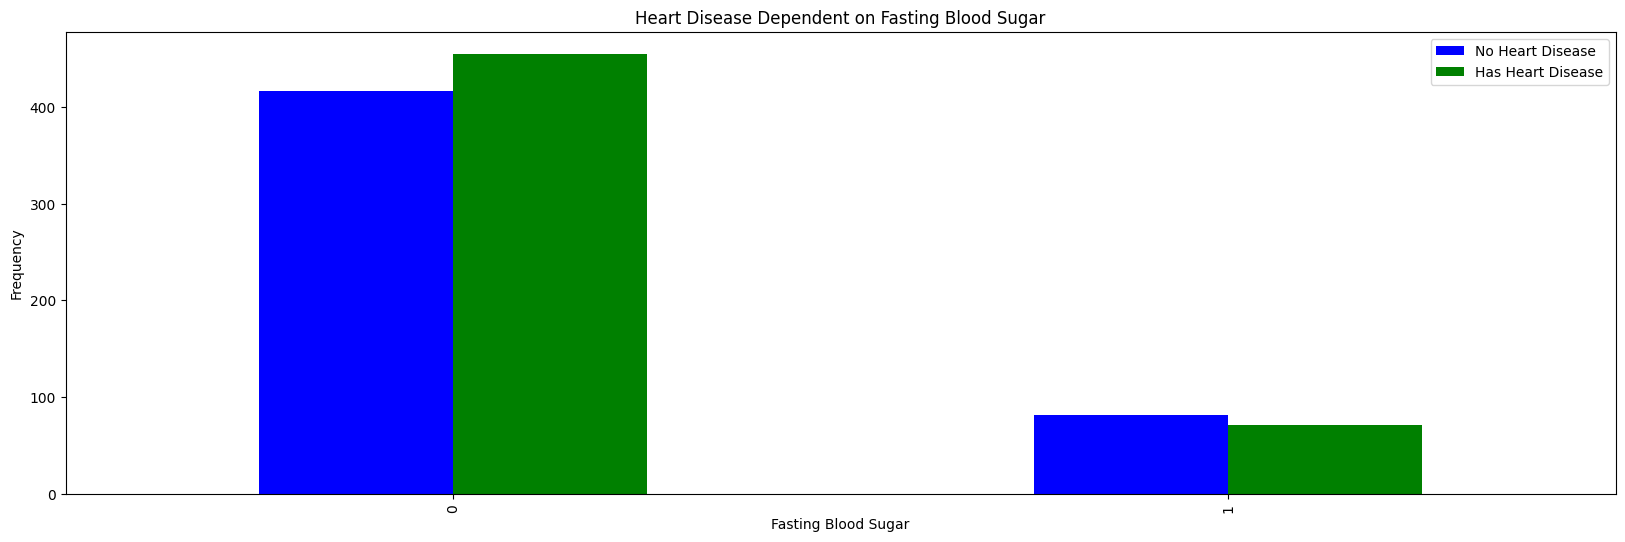

In [9]:
#based on our graph, we can say that fasting blood sugar doesn't correlate negatively or positively to having heart disease
pd.crosstab(df.fbs, df.target).plot(kind = 'bar', figsize = (20, 6), color = ('blue', 'green'))
plt.title('Heart Disease Dependent on Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Frequency')
plt.legend(["No Heart Disease", "Has Heart Disease"])
plt.show()

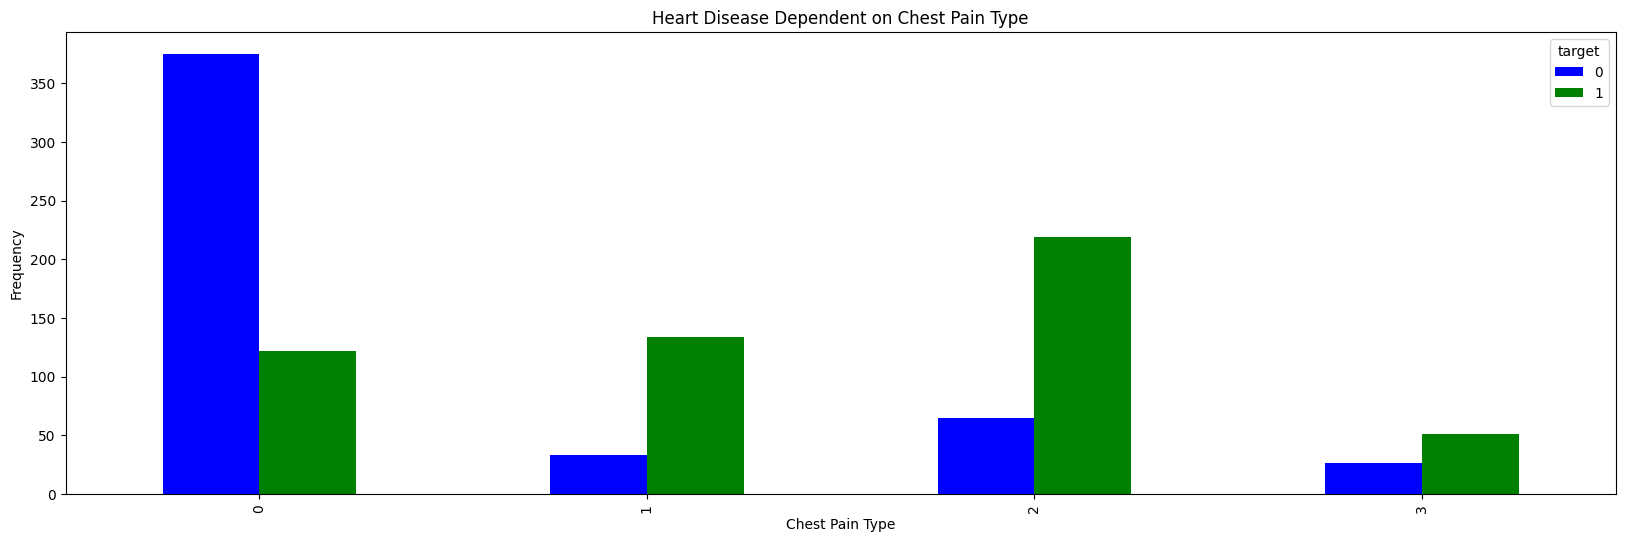

In [10]:
#based on our graph, we can say that chest pain type is positively correlated with having heart disease
pd.crosstab(df.cp, df.target).plot(kind = 'bar', figsize = (20, 6), color =('blue', 'green'))
plt.title('Heart Disease Dependent on Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.show()

In [11]:
#dummy variables
a = pd.get_dummies(df['cp'], prefix='cp')
b = pd.get_dummies(df['thal'], prefix = 'thal')
c = pd.get_dummies(df['slope'], prefix = 'slope')

frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,False,False,False,False,False,False,True,False,False,True
1,53,1,0,140,203,1,0,155,1,3.1,...,False,False,False,False,False,False,True,True,False,False
2,70,1,0,145,174,0,1,125,1,2.6,...,False,False,False,False,False,False,True,True,False,False
3,61,1,0,148,203,0,1,161,0,0.0,...,False,False,False,False,False,False,True,False,False,True
4,62,0,0,138,294,1,1,106,0,1.9,...,False,False,False,False,False,True,False,False,True,False


In [12]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

#min-max normalization
x = (x_data - np.min(x_data))/ (np.max(x_data) - np.min(x_data))

#split dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#fit training and testing data
#transposes
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

logistic regression: used for binary classification (i.e. true/false questions)
* weights: the model will give columns with more impact more weight
* bias: finetunes our answers
* loss: measures how far our predictions are from the actual answers
* gradient: guide/direction of how to improve accuracy (theoretical)
* gradient descent: optimization algorithm for how to minimize loss

In [13]:
#functions for logistic regression
#sigmoid function: converts any number to go between 0 and 1
#equation: 1/(1 + e^(-z))
def sigmoid(z):
  y_head = 1 / (1 + np.exp(-z))
  return y_head

#forward/backward propogation: calculates predictive probabilities of the training data; assessing how well the training data predicts the actual data -> update weights (loss/gradience)/make it more accurate

#forward aspect: calculates predictive probabilities and their costs (loss)
#lambda: regularization (makes model weights more balanced; prevents overfitting)
def forwardBackward(weight, bias, x_train, y_train, lambda_reg=0.01):
  y_head = sigmoid(np.dot(weight.T, x_train) + bias)
  loss = -(y_train * np.log(y_head) + (1 - y_train) * np.log(1 - y_head)) #loss measures how well the model's predicted values match the actual values
  cost = np.sum(loss)/x_train.shape[1] + (lambda_reg / 2) * np.sum(weight ** 2) #sums the loss from each row and divides by the number of rows

  #backward aspect: calculates the gradient of the loss and updates the weights to minimize the loss (makes the model more accurate)
  #figures out what happens to loss if we change any of the weights by a little bit
  derivative_weight = np.dot(x_train, ((y_head - y_train).T)) /x_train.shape[1] + lambda_reg * weight
  derivative_bias = np.sum(y_head - y_train)/x_train.shape[1]

  #map: key-value (i.e. username, password) pair associated with a value (i.e. profile)
  gradients = {'Derivative Weight': derivative_weight, 'Derivative Bias': derivative_bias}

  return cost, gradients

In [14]:
#prediction fucntion: helps us predict the output
def predict(weight, bias, x_test):
  z = np.dot(weight.T, x_test) + bias #weighted sum of the input features + bias
  y_head = sigmoid(z)

  y_prediction = np.zeros((1, x_test.shape[1])) #fills a 1 by (number of cols in x_test) matrix with zeros

  #if we get a value of 0.5 or less from the logistic regression, we say they don't have heart disease, and if they get a value over 0.5, we say they do
  for i in range(y_head.shape[1]):
    if y_head[0, i] <= 0.5:
      y_prediction[0, i] = 0
    else:
      y_prediction[0, i] = 1

  return y_prediction

In [15]:
#intializes weight and bias for our model
def initialize(dimension):
  weight = np.full((dimension, 1), 0.01)
  bias = 0.0
  return weight, bias

In [16]:
#helps improve model performance and optimization process
def scale_features(x_train, x_test):
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train.T).T
  x_test_scaled = scaler.transform(x_test.T).T
  return x_train_scaled, x_test_scaled

In [17]:
#update function: refines the model's parameters (updates weight and bias over time to minimize loss)
def update(weight, bias, x_train, y_train, learningRate, iteration, lambda_reg=0.01):
  costList = []
  index = []

  for i in range(iteration):
    cost, gradients = forwardBackward(weight, bias, x_train, y_train, lambda_reg)
    weight -= learningRate * gradients['Derivative Weight']
    bias -= learningRate * gradients['Derivative Bias']

    costList.append(cost)
    index.append(i)

  parameters = {'weight': weight, 'bias': bias}

  print('Iterations:',  iteration)
  print('Costs:', cost)

  #shows how the cost function changes as the weights and biases are updated over iterations
  #if the cost function is decreasing, our model is improving its fit to our data (making better predictions)
  plt.plot(index, costList)
  plt.xlabel('Number of Iterations')
  plt.ylabel('Cost')
  plt.show()

  return parameters, gradients

Iterations: 100
Costs: 0.45826602090200874


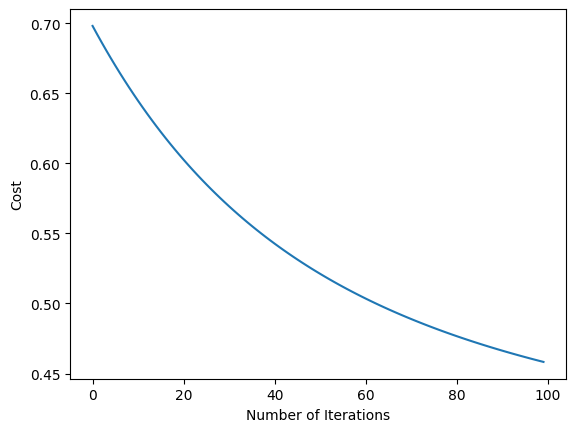

Manual Test Accuracy: 86.69%
Test Accuracy 72.40%


In [18]:
#logistic regression function
def logistic_regression(x_train, y_train, x_test, y_test, learningRate, iterations, lambda_reg=0.01):
  #scale features
  x_train, x_test = scale_features(x_train, x_test)

  #initialize parameters
  dimension = x_train.shape[0]
  weight, bias = initialize(dimension)

  parameters, gradient = update(weight, bias, x_train, y_train, learningRate, iterations, lambda_reg = 0.01)

  #make predictions on the test set
  y_prediction = predict(parameters['weight'], parameters['bias'], x_test)

  #convert probabilities into binary (if > 0.5: 1, else: 0)
  y_prediction_binary = (y_prediction > 0.5).astype(int)

  #calculate the accuracy
  accuracy = np.mean(y_prediction_binary == y_test)
  print('Manual Test Accuracy: {:.2f}%'.format(accuracy * 100)) #accuracy as %

logistic_regression(x_train, y_train, x_test, y_test, learningRate = 0.01, iterations = 100, lambda_reg = 0.01)

accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T, y_test.T) * 100

accuracies['Logistic Regression'] = acc
print('Test Accuracy {:.2f}%'.format(acc))

In [19]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [20]:
#decision tree classifier: continuously asks questions until answer is reached
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train) #fitting the model
acc = dtc.score(x_test, y_test) * 100 #accuracy of the model on our test data as a %
accuracies['Decision Tree'] = acc #adding to our dictionary of model accuracies
print('Decision Tree Accuracy: {:.2f}%'.format(acc))

Decision Tree Accuracy: 99.03%


In [21]:
#random forest classifier: groups related decision trees
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(x_train, y_train)
acc = rf.score(x_test, y_test) * 100
accuracies['Random Forest'] = acc
print('Random Forest Accuracy: {:.2f}%'.format(acc))

Random Forest Accuracy: 100.00%


KNN Model Accuracy: 93.18%


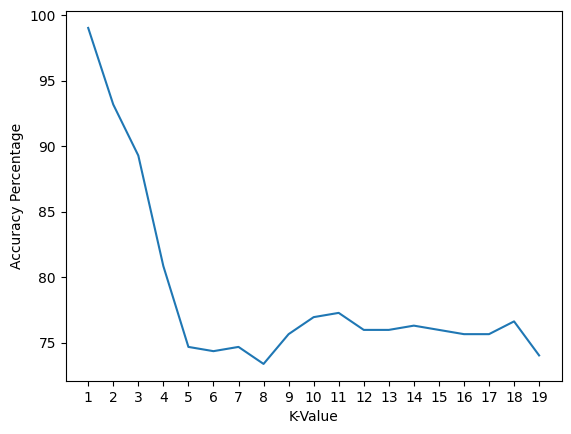

In [22]:
#KNN: finds k closest neighbors
knn = KNeighborsClassifier(n_neighbors=2) #2 closest neighbors
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
acc = knn.score(x_test, y_test) * 100

scoreList = [] #holds accuracies of the model for different numbers of neighbors
for i in range(1, 20):
  knn2 = KNeighborsClassifier(n_neighbors=i)
  knn2.fit(x_train, y_train)
  scoreList.append(knn2.score(x_test, y_test)*100)

print('KNN Model Accuracy: {:.2f}%'.format(acc))

plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel('K-Value')
plt.ylabel('Accuracy Percentage')
plt.show()

accuracies['KNN Model'] = acc

In [23]:
#support vector machine (SVM) algorithm
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
acc = svm.score(x_test, y_test) * 100
accuracies['SVM'] = acc
print('SVM Algorithm Accuracies: {:.2f}%'.format(acc))

SVM Algorithm Accuracies: 75.00%


In [24]:
#Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
acc = nb.score(x_test, y_test) * 100
accuracies['Naive Bayes'] = acc
print('Naive Bayes Accuracy: {:.2f}%'.format(acc))

Naive Bayes Accuracy: 88.31%


<ipython-input-25-331331195582>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


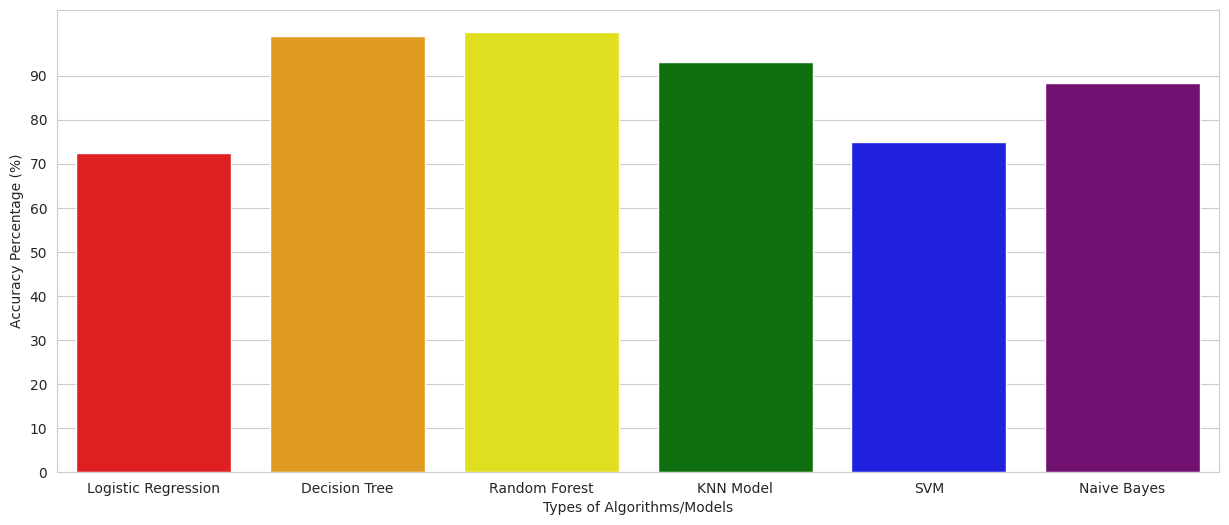

In [25]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
plt.yticks(np.arange(0, 100, 10))
plt.xlabel('Types of Algorithms/Models')
plt.ylabel('Accuracy Percentage (%)')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [26]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=None)

In [27]:
#sequential model
model = Sequential() #layer 1: variables with weights assigned
model.add(Input(shape=(24,)))
model.add(Dense(50, activation='relu')) #layer 2: weighted sum of variables (good when > 0)
model.add(Dropout(0.5)) #drop half the neurons each time
model.add(BatchNormalization()) #stabilizes the neural network; faster learning through normalized outputs
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) #returns a single neuron with value 0 or  1

In [28]:
#apply optimizer algorithm
optimizer = Adam(learning_rate = 0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience = 10) #model stops if there are 10 consecutive epochs without improvement

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks = [early_stopping])

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4889 - loss: 0.7934 - val_accuracy: 0.5294 - val_loss: 0.6911
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5099 - loss: 0.7516 - val_accuracy: 0.5294 - val_loss: 0.6914
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5547 - loss: 0.6955 - val_accuracy: 0.5294 - val_loss: 0.6917
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5515 - loss: 0.6894 - val_accuracy: 0.5294 - val_loss: 0.6916
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5486 - loss: 0.6935 - val_accuracy: 0.5294 - val_loss: 0.6911
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6306 - loss: 0.6511 - val_accuracy: 0.5294 - val_loss: 0.6901
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6021 - loss: 0.6674 - val_accuracy: 0.5294 - val_loss: 0.6885
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6168 - loss: 0.6478 - val_accuracy: 0.5294 - 

In [29]:
#prints test loss and test accuracy on our testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'TestLoss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob.flatten() > 0.5).astype(int)

#shows predicted values in binary compared to actual values within target value of our dataset
print(f'Predictions: {y_pred}')
print(f'True Values: {y_test.flatten()}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8636 - loss: 0.3297 
TestLoss: 0.3446902334690094
Test Accuracy: 0.8543689250946045
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predictions: [0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1]
True Values: [0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1]
